# Bulldozer Price Predictions 

We will be predicting the sale price of the bulldozer

## 1. Problem Defination

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozer have been solf for?

## 2. Data

The data is downloaded from Kaggle Bluebook for Bulldozer

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

These are given in the Data Dictionary in the data folder.


In [35]:
# importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing the training and validation sets
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

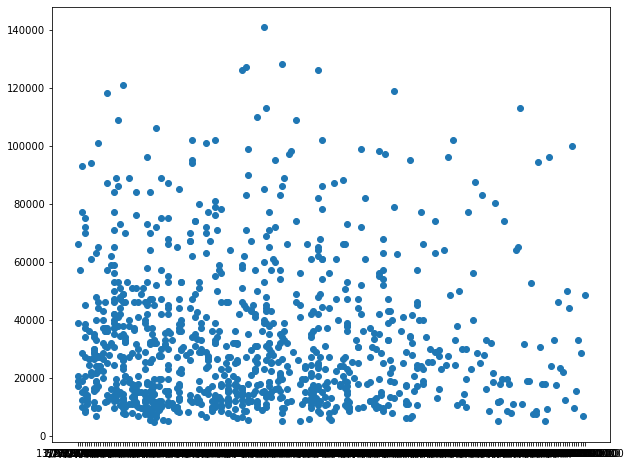

In [5]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df['saledate'][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

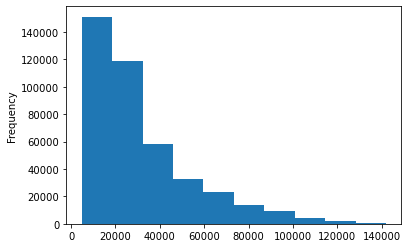

In [6]:
df.SalePrice.plot.hist()

In [7]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

### Parsing dates


In [8]:
# Importing the data again with parsed dates
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

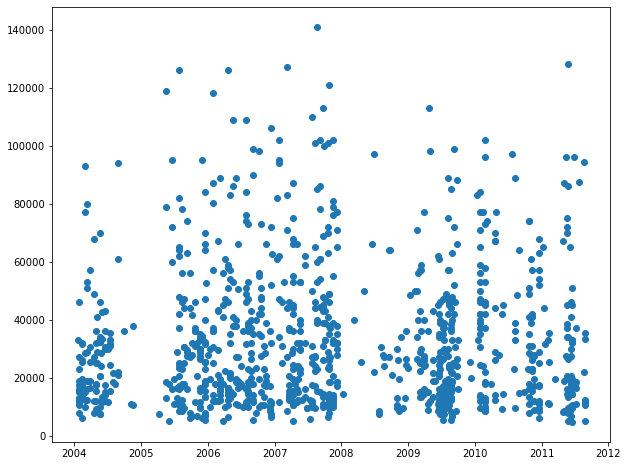

In [10]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
# sorting the data by saledate
df.sort_values(by = ["saledate"],inplace = True,ascending= True)
df.saledate[:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
# making a copy of the original dataframe
df_tmp = df.copy()

### Add datetime parameters for saledata column

In [14]:
# making new features
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [15]:
# removing the saledate column
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
# Checking the states
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

### Converting the dtype into numbers

In [17]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [18]:
# finding the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [62]:
## turning the values to categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [21]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [22]:
# checking the values
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [23]:
# saving the preprocessed data

df_tmp.to_csv("data/train_tmp.csv",index=False)

In [24]:
# importing the preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv",low_memory=False)

## Filling the missing values
### Filling the numerical missing values

In [25]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
# filling the numerical with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # adding a binart column which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #fill the numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [27]:
# checking if there is any null value
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [28]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
saledate                                    0
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

### filling and turning categorical variables

In [29]:
# checking columns which arent numeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# turning categorical variable into numbers 
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary column
        df_tmp[label +"_is_missing"] = pd.isnull(content)
        #turn the categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 105 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(3), int16(5), int64(10), int8(40)
memory usage: 79.1 MB


 Now that all our data is numeric and we dont have any null values we can start making a model

In [32]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True


In [36]:
%%time

X = df_tmp.drop("SalePrice",axis = 1)
y = df_tmp["SalePrice"]
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# fitting the model
model.fit(X,y)

CPU times: user 36min 8s, sys: 7.24 s, total: 36min 15s
Wall time: 5min 7s


RandomForestRegressor(n_jobs=-1)

In [37]:
# Scoring the model

model.score(X,y)

0.9878869067225462

## Splitting the data into train and validation set

data till end of 2011 will be in the training set while the data from january 1 2012 to april 30 2012 will be validation set

In [38]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [39]:
# splitting the data
df_train = df_tmp[df_tmp.saleYear != 2012]
df_val = df_tmp[df_tmp.saleYear == 2012]

In [43]:
# splitting the data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

## Buidling an evaluation function


In [46]:
# Creating evaluation fuction
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train,train_preds),
        "Valid MAE": mean_absolute_error(y_valid,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "Valid RMSLE": rmsle(y_valid,val_preds),
        "Training R^2": r2_score(y_train,train_preds),
        "Valid R^2": r2_score(y_valid,val_preds)
    }
    return scores

## Testing our model on a subset

In [48]:
# testing the model by changing max_samples

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [49]:
%%time

model.fit(X_train,y_train)

CPU times: user 47.2 s, sys: 413 ms, total: 47.6 s
Wall time: 7.85 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [50]:
show_scores(model)

{'Training MAE': 5466.239305129321,
 'Valid MAE': 7260.289019268987,
 'Training RMSLE': 0.2551666876405142,
 'Valid RMSLE': 0.29887271623967787,
 'Training R^2': 0.8642843539479744,
 'Valid R^2': 0.8304445443415891}

### Tuning hyperparameters

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparamters
rf_grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features":[0.5,1,"sqrt","auto"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=5,
                             cv=5,
                             verbose=True)
# fitting the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [54]:
# finding the best parameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [55]:
# Evaluate the RCV Model
show_scores(rs_model)

{'Training MAE': 6712.676649265607,
 'Valid MAE': 8812.614927849305,
 'Training RMSLE': 0.30388240716633974,
 'Valid RMSLE': 0.3643912992025658,
 'Training R^2': 0.8063467069370516,
 'Valid R^2': 0.7744297731212073}

### Training a model with the best hyperparameter
Note: this was doen at n_iters = 100

In [57]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=4,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                   random_state=42)

# Fitting the model
ideal_model.fit(X_train, y_train)

CPU times: user 20.4 s, sys: 299 ms, total: 20.7 s
Wall time: 6.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=4,
                      n_jobs=-1, random_state=42)

In [58]:
 show_scores(ideal_model)

{'Training MAE': 3201.0788930993112,
 'Valid MAE': 6593.267040406302,
 'Training RMSLE': 0.15772882555261505,
 'Valid RMSLE': 0.2724078005897325,
 'Training R^2': 0.9494753265298183,
 'Valid R^2': 0.8560337729470215}

## Make predictions on the test data

In [123]:
df_test = pd.read_csv("data/Test.csv", low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data 

In [124]:
def preprocess_data(df):
    """
    Performs tranformation on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    
    df.drop("saledate", axis = 1, inplace =False)
    
    # filling the numerical with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # adding a binart column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                #fill the numeric values with median
                df[label] = content.fillna(content.median())
            
    # turning categorical variable into numbers 
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # add a binary column
            df[label +"_is_missing"] = pd.isnull(content)
            #turn the categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [125]:
# Preprocess the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [126]:
test_preds = ideal_model.predict(df_test)

ValueError: X has 103 features, but DecisionTreeRegressor is expecting 104 features as input.

In [127]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2119,...,True,True,True,True,True,False,False,False,True,True


In [129]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [130]:
# finding out how the column differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [131]:
# manually adjusting df_test
df_test["auctioneerID_is_missing"] = False

In [133]:
# making predictions
test_preds = ideal_model.predict(df_test)
test_preds

array([19337.3015873 , 24204.08411033, 74117.96536797, ...,
       26394.60784314, 21681.15079365, 50261.36363636])

In [136]:
# Format predictions into the same format kaggle wants
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19337.301587
1,1227844,24204.084110
2,1227847,74117.965368
3,1227848,66938.751263
4,1227863,17194.444444
...,...,...
12452,6643171,64475.852273
12453,6643173,19001.388889
12454,6643184,26394.607843
12455,6643186,21681.150794


In [137]:
# Export predictions data
df_preds.to_csv("data/test_predictions", index=False)

### Feature Importance
Feature importance helps us ot determine which attribute was the most importance when it comes to predicting

In [138]:
# Finding the feature importance
ideal_model.feature_importances_

array([3.00818653e-02, 1.83766771e-02, 4.17906288e-02, 7.67653145e-04,
       3.04451953e-03, 1.90425368e-01, 2.63211852e-03, 8.38701557e-04,
       6.43959627e-02, 3.85186645e-02, 3.99669102e-02, 7.57404551e-02,
       6.09923446e-03, 1.91501997e-02, 1.28870114e-01, 5.74853428e-02,
       5.39993173e-03, 4.95139394e-03, 5.73401550e-04, 1.24467900e-03,
       3.68564183e-02, 5.31920302e-04, 3.89495812e-05, 1.04301386e-03,
       1.40846335e-04, 1.26697335e-03, 1.54534501e-05, 8.15354935e-05,
       2.05188586e-02, 8.14705780e-04, 9.72158933e-05, 2.11242012e-02,
       2.76730052e-04, 2.39367162e-03, 8.06583175e-05, 2.11055082e-03,
       1.06230760e-02, 5.62389812e-04, 2.54195743e-02, 3.54373340e-06,
       1.44857943e-06, 3.31470816e-04, 5.34515160e-04, 9.59610077e-04,
       5.48552363e-04, 3.02577549e-04, 4.66123023e-04, 9.15530851e-05,
       1.25422681e-03, 8.68086373e-04, 2.50379483e-04, 5.54477130e-04,
       2.63861474e-02, 2.45969903e-03, 4.62164735e-03, 2.53858591e-03,
      

In [148]:
def plot_features(columns, importances, n = 20):
        df = (pd.DataFrame({"features":columns,"feature_importance": importances}).sort_values("feature_importance", ascending = False).reset_index(drop= True))
        
        # Plot the DataFrame
        fig, ax = plt.subplots()
        ax.barh(df["features"][:n],df["feature_importance"][:n])
        ax.set_ylabel("Features")
        ax.set_xlabel("Feature Importance")

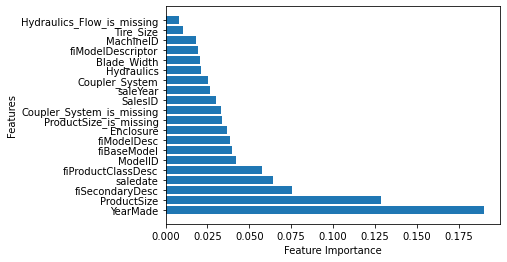

In [149]:
plot_features(X_train.columns,ideal_model.feature_importances_)